# SmartBeds - One-Class entrenado con dos crisis

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [1]:
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import pickle as pk
from sklearn import metrics as mtr
from sklearn import svm
from transformers import MoveTargetsTransformer

In [2]:
def createDatos(nombre):
    return {'Raw':nombre+"raw.pdd",'SavGol':nombre+"savgol.pdd",'Butter':nombre+"butter.pdd",
         'Stats':nombre+"stats.pdd",'SavGol-Stats':nombre+"savgol-stats.pdd","Butter-Stats":nombre+"butter-stats.pdd"}

In [6]:
trainDS = createDatos('data/train-')
testDS = createDatos('data/test-')

### Trainer

In [7]:
def train(dataframe):
    data = dataframe.iloc[:,1:len(dataframe.columns)-1]
    clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
    clf.fit(data)
    return clf
def predict(dataframe,classifier):
    data = dataframe.iloc[:,1:len(dataframe.columns)-1]
    return classifier.predict(data)
def score(dataframe,classifier):
    data = dataframe.iloc[:,1:len(dataframe.columns)-1]
    return classifier.score_samples(data)

### Raw

In [8]:
with open(trainDS['Raw'],'rb') as f:
    raw = pk.load(f)
crisis = raw[raw['target']==True]
no_crisis = raw[raw['target']==False]
crisis.head()

,DateTime,P1,P2,P3,P4,P5,P6,target
4147832,2018-11-10 03:36:10,6.557377,27.868852,22.950820,27.049180,27.049180,18.032787,True
4147833,2018-11-10 03:36:10,0.000000,27.049180,25.409836,31.967213,35.245902,24.590164,True
4147834,2018-11-10 03:36:11,0.000000,24.590164,24.590164,30.327869,31.967213,21.311475,True
4147835,2018-11-10 03:36:11,0.000000,22.131148,22.950820,27.868852,27.868852,19.672131,True
4147836,2018-11-10 03:36:11,0.000000,18.032787,18.852459,26.229508,27.868852,18.032787,True


In [9]:
raw_clf = train(crisis)

In [10]:
y = predict(raw,raw_clf)
y[y==-1]=0
y=y.astype('bool')

In [11]:
mtr.confusion_matrix(raw['target'],y)

array([[171109,  36209],
       [   117,   1042]])

0.9248269744475858


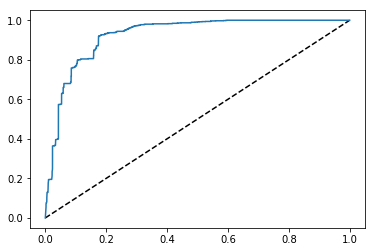

In [12]:
scr = score(raw,raw_clf)
fpr, tpr, thr = mtr.roc_curve(raw['target'],scr)
print(mtr.roc_auc_score(raw['target'],scr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

### SavGol

In [14]:
with open(trainDS['SavGol'],'rb') as f:
    savgol = pk.load(f)
crisis = savgol[savgol['target']==True]
no_crisis = savgol[savgol['target']==False]

In [15]:
savgol_clf = train(crisis)

In [16]:
y = predict(savgol,savgol_clf)
y[y==-1]=0
y=y.astype('bool')

In [17]:
mtr.confusion_matrix(savgol['target'],y)

array([[185987,  21331],
       [   116,   1043]])

0.960667294147189


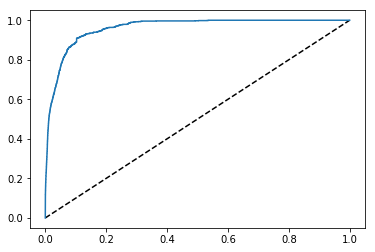

In [18]:
scr = score(savgol,savgol_clf)
fpr, tpr, thr = mtr.roc_curve(savgol['target'],scr)
print(mtr.roc_auc_score(savgol['target'],scr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

### Butter

In [20]:
with open(trainDS['Butter'],'rb') as f:
    butter = pk.load(f)
crisis = butter[butter['target']==True]
no_crisis = butter[butter['target']==False]

In [21]:
butter_clf = train(crisis)

In [22]:
y = predict(butter,butter_clf)
y[y==-1]=0
y=y.astype('bool')

In [23]:
mtr.confusion_matrix(butter['target'],y)

array([[192713,  14605],
       [   115,   1044]])

0.9533875220937675


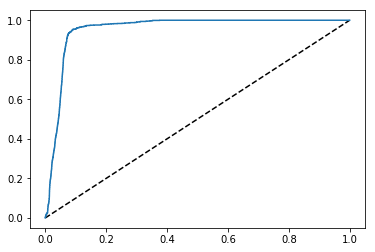

In [24]:
scr = score(butter,butter_clf)
fpr, tpr, thr = mtr.roc_curve(butter['target'],scr)
print(mtr.roc_auc_score(butter['target'],scr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

### Stats

In [25]:
trueT = MoveTargetsTransformer(window = 25) #Definición manual de la ventana por conocimiento del equipo

In [26]:
with open(trainDS['Stats'],'rb') as f:
    stats = pk.load(f).dropna()
stats = trueT.fit_transform(stats)
crisis = stats[stats['target']==True]
no_crisis = stats[stats['target']==False]
crisis.head()

,DateTime,P1 mean 25,P2 mean 25,P3 mean 25,P4 mean 25,P5 mean 25,P6 mean 25,P1 std 25,P2 std 25,P3 std 25,P4 std 25,P5 std 25,P6 std 25,P1 range 25,P2 range 25,P3 range 25,P4 range 25,P5 range 25,P6 range 25,target
4147857,2018-11-10 03:36:20,1.507062e-15,51.808067,49.235049,64.255911,66.968011,43.463143,0.0,10.982741,7.034836,10.208634,13.458740,10.824708,0.0,18.644068,13.559322,16.949153,18.644068,13.559322,True
4147858,2018-11-10 03:36:20,1.507062e-15,51.668985,49.026426,63.977747,66.550765,43.045897,0.0,10.625483,6.563443,10.168043,12.829475,9.759909,0.0,15.254237,13.559322,16.949153,18.644068,13.559322,True
4147859,2018-11-10 03:36:21,1.507062e-15,52.016690,48.817803,63.908206,66.620306,42.767733,0.0,10.412526,6.420108,10.106850,12.294505,9.910582,0.0,15.254237,13.559322,16.949153,18.644068,13.559322,True
4147860,2018-11-10 03:36:21,1.507062e-15,51.738526,48.887344,63.838665,66.411683,42.837274,0.0,10.686931,6.339077,10.296032,12.861670,9.812732,0.0,15.254237,13.559322,16.949153,18.644068,13.559322,True
4147861,2018-11-10 03:36:21,1.507062e-15,52.642559,49.095967,64.116829,66.828929,42.837274,0.0,7.251937,4.408758,9.218776,11.673338,9.724534,0.0,11.864407,6.779661,11.864407,13.559322,11.864407,True


In [27]:
stats_clf = train(crisis)

In [28]:
y = predict(stats,stats_clf)
y[y==-1]=0
y=y.astype('bool')

In [29]:
mtr.confusion_matrix(stats['target'],y)

array([[207295,      0],
       [   122,   1012]])

1.0


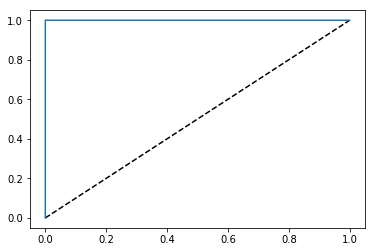

In [30]:
scr = score(stats,stats_clf)
fpr, tpr, thr = mtr.roc_curve(stats['target'],scr)
print(mtr.roc_auc_score(stats['target'],scr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

### SavGol Stats

In [32]:
with open(trainDS['SavGol-Stats'],'rb') as f:
    savgol_s = pk.load(f).dropna()
savgol_s = trueT.fit_transform(savgol_s)
crisis = savgol_s[savgol_s['target']==True]
no_crisis = savgol_s[savgol_s['target']==False]

In [33]:
savgol_s_clf = train(crisis)

In [34]:
y = predict(savgol_s,savgol_s_clf)
y[y==-1]=0
y=y.astype('bool')

In [35]:
mtr.confusion_matrix(savgol_s['target'],y)

array([[207293,      2],
       [   134,   1000]])

0.9999966265730837


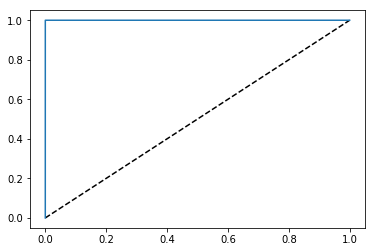

In [36]:
scr = score(savgol_s,savgol_s_clf)
fpr, tpr, thr = mtr.roc_curve(savgol_s['target'],scr)
print(mtr.roc_auc_score(savgol_s['target'],scr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

### Butter Stats

In [34]:
with open(datos['Butter-Stats'],'rb') as f:
    butter_s = pk.load(f).dropna()
butter_s = trueT.fit_transform(butter_s)
crisis = butter_s[butter_s['target']==True]
no_crisis = butter_s[butter_s['target']==False]

In [35]:
butter_s_clf = train(crisis)

In [36]:
y = predict(butter_s,butter_s_clf)
y[y==-1]=0
y=y.astype('bool')

In [37]:
mtr.confusion_matrix(butter_s['target'],y)

array([[103426,      0],
       [    61,    538]])

1.0


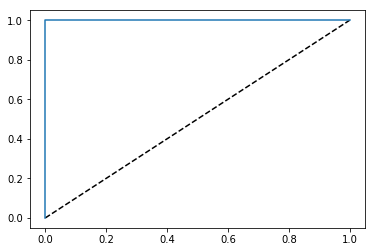

In [38]:
scr = score(butter_s,butter_s_clf)
fpr, tpr, thr = mtr.roc_curve(butter_s['target'],scr)
print(mtr.roc_auc_score(butter_s['target'],scr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)

### Almacenado de clasificadores

In [39]:
clasificadores = [raw_clf,savgol_clf,butter_clf,stats_clf,savgol_s_clf,butter_s_clf]
nombres = ["RAW","SAVGOL","BUTTER","STATS","SAVGOL-STATS","BUTTER_STATS"]
for i in range(len(nombres)):
    with open("classifiers/"+nombres[i]+"-seizure-classifier.pkl",'wb') as f:
        pk.dump(clasificadores[i],f)